In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns


# Load the training and test data
train_data = pd.read_csv('../input/medical-treatment-dataset/trainms.csv')



In [2]:
# Drop unnecessary columns (if needed)
train_data = train_data.drop(columns=['s.no', 'Timestamp', 'comments'])

# Encode categorical features
le = LabelEncoder()
categorical_columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history',
                        'work_interfere', 'no_employees', 'remote_work', 'tech_company',
                        'benefits', 'care_options', 'wellness_program', 'seek_help',
                        'anonymity', 'leave', 'mental_health_consequence',
                        'phys_health_consequence', 'coworkers', 'supervisor',
                        'mental_health_interview', 'phys_health_interview',
                        'mental_vs_physical', 'obs_consequence']
for column in categorical_columns:
    if column in train_data.columns:
        train_data[column] = le.fit_transform(train_data[column])

# Split the data into features and target variable
X = train_data.drop('treatment', axis=1)
y = train_data['treatment']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

# Evaluate models before feature selection
dt_accuracy_before = round(accuracy_score(y_val, dt_pred), 2)
rf_accuracy_before = round(accuracy_score(y_val, rf_pred), 2)

dt_precision_before = round(precision_score(y_val, dt_pred, pos_label='Yes'), 2)
dt_recall_before = round(recall_score(y_val, dt_pred, pos_label='Yes'), 2)
dt_f1_before = round(f1_score(y_val, dt_pred, pos_label='Yes'), 2)

rf_precision_before = round(precision_score(y_val, rf_pred, pos_label='Yes'), 2)
rf_recall_before = round(recall_score(y_val, rf_pred, pos_label='Yes'), 2)
rf_f1_before = round(f1_score(y_val, rf_pred, pos_label='Yes'), 2)

# Display metrics
print("Decision Tree Metrics Before Feature Selection:")
print(f'Accuracy: {dt_accuracy_before}')
print(f'Precision: {dt_precision_before}')
print(f'Recall: {dt_recall_before}')
print(f'F1 Score: {dt_f1_before}')

print("\nRandom Forest Metrics Before Feature Selection:")
print(f'Accuracy: {rf_accuracy_before}')
print(f'Precision: {rf_precision_before}')
print(f'Recall: {rf_recall_before}')
print(f'F1 Score: {rf_f1_before}')

Decision Tree Metrics Before Feature Selection:
Accuracy: 0.76
Precision: 0.73
Recall: 0.77
F1 Score: 0.75

Random Forest Metrics Before Feature Selection:
Accuracy: 0.82
Precision: 0.78
Recall: 0.88
F1 Score: 0.82


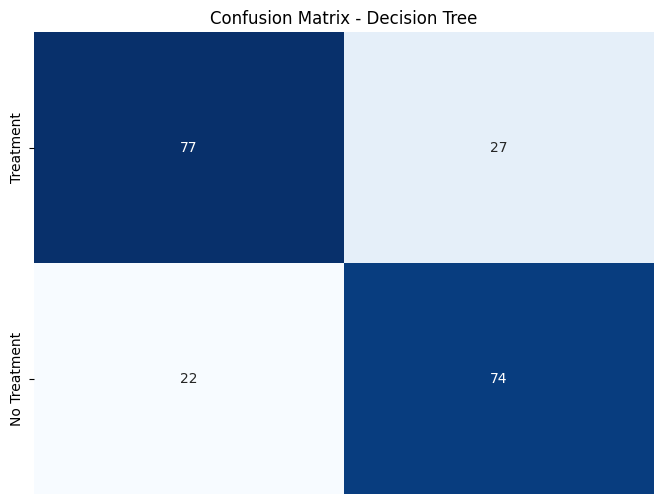

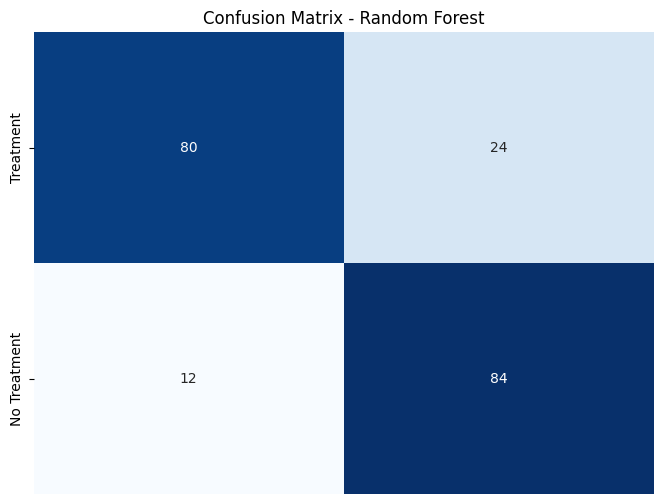

In [3]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_val, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels = False, 
             yticklabels=['Treatment', 'No Treatment'], cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_val, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels = False,
            yticklabels=['Treatment', 'No Treatment'], cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()



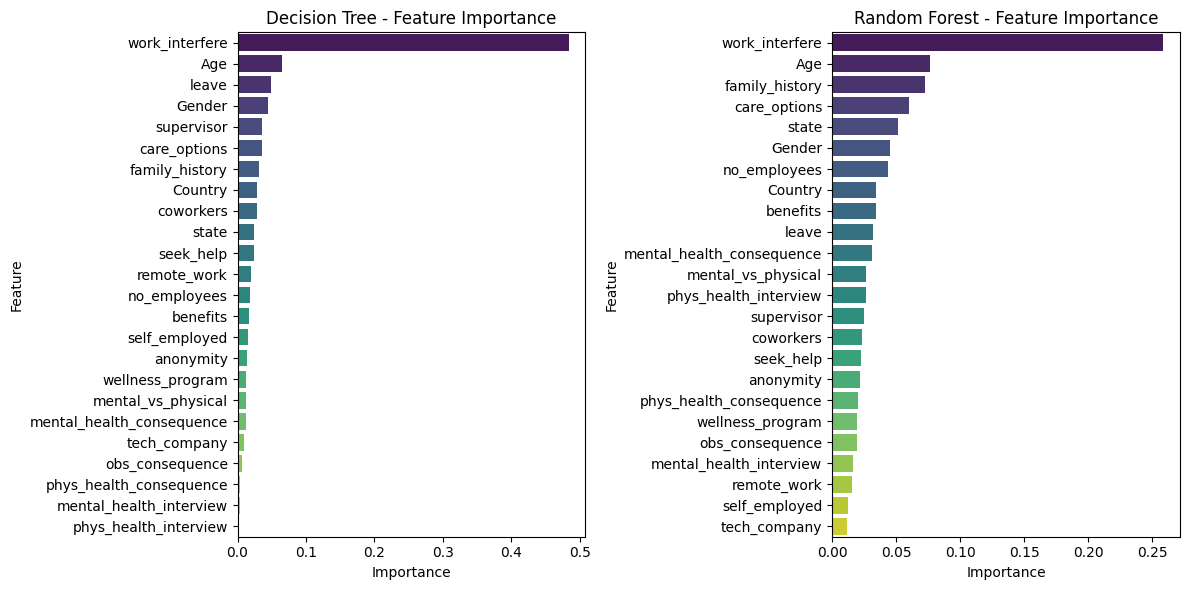

In [4]:
# Feature Importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_
dt_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_importance})
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature Importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importance})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df, palette='viridis')
plt.title('Decision Tree - Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df, palette='viridis')
plt.title('Random Forest - Feature Importance')

plt.tight_layout()
plt.show()


In [5]:
# Find instances where Decision Tree made mistakes
dt_errors = X_val[y_val != dt_pred]

# Find instances where Random Forest made mistakes
rf_errors = X_val[y_val != rf_pred]

# Identify common attributes for Decision Tree errors
common_attributes_dt_errors = dt_errors.mean().round(2).sort_values(ascending=False)

# Identify common attributes for Random Forest errors
common_attributes_rf_errors = rf_errors.mean().round(2).sort_values(ascending=False)

print("Common Attributes for Decision Tree Errors:")
print(common_attributes_dt_errors)

print("\nCommon Attributes for Random Forest Errors:")
print(common_attributes_rf_errors)



Common Attributes for Decision Tree Errors:
Age                          32.27
state                        31.29
Country                      29.14
Gender                       19.73
no_employees                  2.96
work_interfere                1.82
leave                         1.31
benefits                      1.00
wellness_program              1.00
mental_health_consequence     0.98
mental_health_interview       0.94
mental_vs_physical            0.92
care_options                  0.90
tech_company                  0.88
seek_help                     0.86
supervisor                    0.86
coworkers                     0.78
phys_health_interview         0.78
phys_health_consequence       0.76
anonymity                     0.49
family_history                0.31
remote_work                   0.24
self_employed                 0.20
obs_consequence               0.20
dtype: float64

Common Attributes for Random Forest Errors:
Country                      33.69
Age                  

In [6]:
# Feature Selection
top_features = dt_feature_importance_df['Feature'].head(9).tolist()
X_train_selected = X_train[top_features]
X_val_selected = X_val[top_features]

# Decision Tree after feature selection
dt_model.fit(X_train_selected, y_train)
dt_pred_selected = dt_model.predict(X_val_selected)
dt_accuracy_selected = round(accuracy_score(y_val, dt_pred_selected), 2)

# Random Forest after feature selection
rf_model.fit(X_train_selected, y_train)
rf_pred_selected = rf_model.predict(X_val_selected)
rf_accuracy_selected = round(accuracy_score(y_val, rf_pred_selected), 2)

dt_precision_selected = round(precision_score(y_val, dt_pred_selected, pos_label='Yes'), 2)
dt_recall_selected = round(recall_score(y_val, dt_pred_selected, pos_label='Yes'), 2)
dt_f1_selected = round(f1_score(y_val, dt_pred_selected, pos_label='Yes'), 2)

rf_precision_selected = round(precision_score(y_val, rf_pred_selected, pos_label='Yes'), 2)
rf_recall_selected = round(recall_score(y_val, rf_pred_selected, pos_label='Yes'), 2)
rf_f1_selected = round(f1_score(y_val, rf_pred_selected, pos_label='Yes'), 2)

print("\nDecision Tree Metrics After Feature Selection:")
print(f'Accuracy: {dt_accuracy_selected}')
print(f'Precision: {dt_precision_selected}')
print(f'Recall: {dt_recall_selected}')
print(f'F1 Score: {dt_f1_selected}')

print("\nRandom Forest Metrics After Feature Selection:")
print(f'Accuracy: {rf_accuracy_selected}')
print(f'Precision: {rf_precision_selected}')
print(f'Recall: {rf_recall_selected}')
print(f'F1 Score: {rf_f1_selected}')



Decision Tree Metrics After Feature Selection:
Accuracy: 0.77
Precision: 0.77
Recall: 0.75
F1 Score: 0.76

Random Forest Metrics After Feature Selection:
Accuracy: 0.84
Precision: 0.81
Recall: 0.86
F1 Score: 0.83


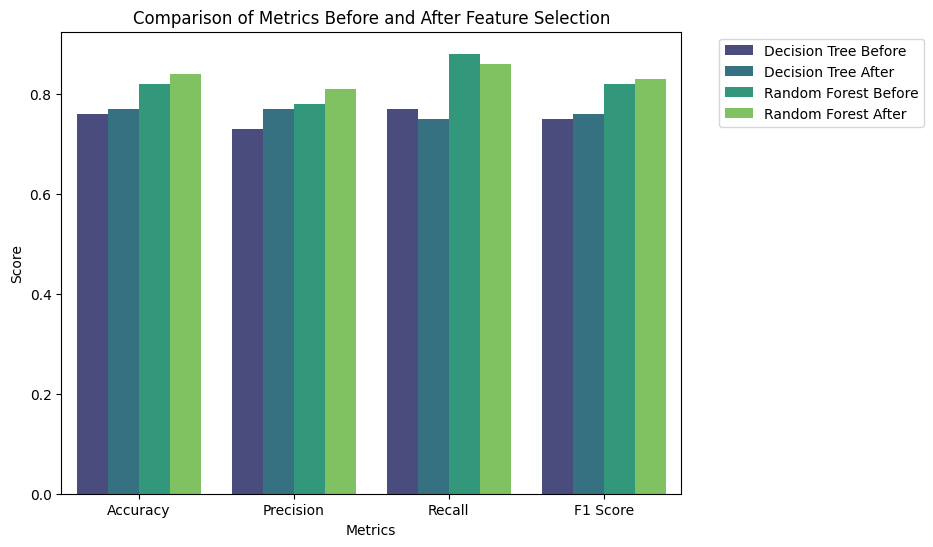

In [7]:
# Comparison chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_metrics_before = [dt_accuracy_before, dt_precision_before, dt_recall_before, dt_f1_before]
rf_metrics_before = [rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before]
dt_metrics_selected = [dt_accuracy_selected, dt_precision_selected, dt_recall_selected, dt_f1_selected]
rf_metrics_selected = [rf_accuracy_selected, rf_precision_selected, rf_recall_selected, rf_f1_selected]

# Data for the bar chart
data = {'Metrics': metrics_names * 4,
        'Classifier': ['Decision Tree Before'] * 4 + ['Decision Tree After'] * 4 +
                      ['Random Forest Before'] * 4 + ['Random Forest After'] * 4,
        'Score': dt_metrics_before + dt_metrics_selected + rf_metrics_before + rf_metrics_selected}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the bar chart with adjusted legend placement
plt.figure(figsize=(8, 6))
sns.barplot(x='Metrics', y='Score', hue='Classifier', data=df, palette='viridis')
plt.title('Comparison of Metrics Before and After Feature Selection')

# Move the legend to the right outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
